In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
import warnings
warnings.filterwarnings('ignore')

In [15]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo_sales.csv', header=0,parse_dates=True,index_col='Month')

In [16]:
series.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [17]:
series = series.dropna()

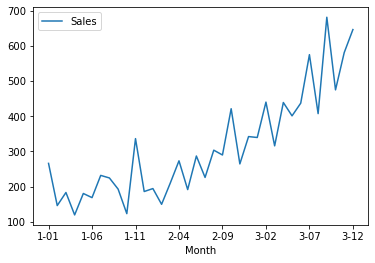

In [18]:
series.plot()
plt.show()

In [19]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [20]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [21]:
train, test = X[0:size], X[size:len(X)]

In [22]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

Predicted=[272.96447746],Expected =[421.6]
Predicted=[290.31390671],Expected =[264.5]
Predicted=[349.11763249],Expected =[342.3]
Predicted=[306.51297343],Expected =[339.7]
Predicted=[387.37643219],Expected =[440.4]
Predicted=[348.15422711],Expected =[315.9]
Predicted=[386.30880788],Expected =[439.3]
Predicted=[356.08203516],Expected =[401.3]
Predicted=[446.37950657],Expected =[437.4]
Predicted=[394.73730999],Expected =[575.5]
Predicted=[434.91565842],Expected =[407.6]
Predicted=[507.92347791],Expected =[682.]
Predicted=[435.48296839],Expected =[475.3]
Predicted=[652.74378576],Expected =[581.3]
Predicted=[546.3435215],Expected =[646.9]
TEST MSE :7547.80521019218


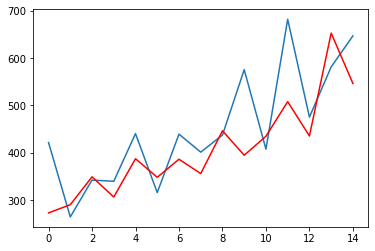

In [23]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()